In [5]:
from time import time
import numpy as np
from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from elm import ELMClassifier, ELMRegressor, GenELMClassifier, GenELMRegressor
from random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer

In [6]:
def make_toy():
    x = np.arange(0.25, 20, 0.1)
    y = x * np.cos(x) + 0.5 * np.sqrt(x) * np.random.randn(x.shape[0])
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    return x, y

In [7]:
def res_dist(x, y, e, n_runs=100, random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=random_state)

    test_res = []
    train_res = []
    start_time = time()

    for i in range(n_runs):
        e.fit(x_train, y_train)
        train_res.append(e.score(x_train, y_train))
        test_res.append(e.score(x_test, y_test))
        if (i % (n_runs / 10) == 0):
            print(f"{i:d}")

    print(f"\nTime: {time() - start_time:.3f} secs")

    print(f"Test Min: {min(test_res):.3f} Mean: {np.mean(test_res):.3f} Max: {max(test_res):.3f} SD: {np.std(test_res):.3f}")
    print(f"Test Min: {min(train_res):.3f} Mean: {np.mean(train_res):.3f} Max: {max(train_res):.3f} SD: {np.std(train_res):.3f}")
    print()
    return (train_res, test_res)

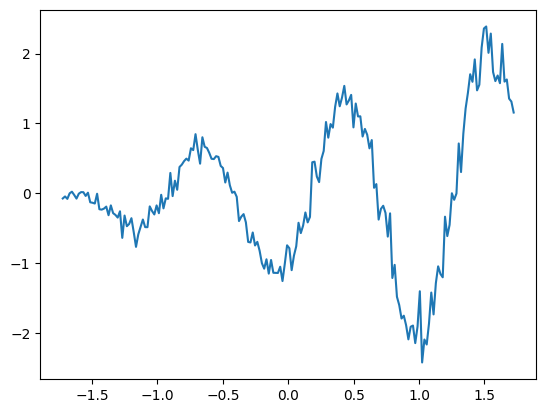

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_digits, load_diabetes, make_regression

stdsc = StandardScaler()

iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
irx_train, irx_test, iry_train, iry_test = train_test_split(irx, iry, test_size=0.2)

digits = load_digits()
dgx, dgy = stdsc.fit_transform(digits.data / 16.0), digits.target
dgx_train, dgx_test, dgy_train, dgy_test = train_test_split(dgx, dgy, test_size=0.2)

diabetes = load_diabetes()
dbx, dby = stdsc.fit_transform(diabetes.data), diabetes.target
dbx_train, dbx_test, dby_train, dby_test = train_test_split(dbx, dby, test_size=0.2)

mrx, mry = make_regression(n_samples=2000, n_targets=4)
mrx_train, mrx_test, mry_train, mry_test = train_test_split(mrx, mry, test_size=0.2)

xtoy, ytoy = make_toy()
xtoy, ytoy = stdsc.fit_transform(xtoy), stdsc.fit_transform(ytoy)
xtoy_train, xtoy_test, ytoy_train, ytoy_test = train_test_split(xtoy, ytoy, test_size=0.2)
plt.plot(xtoy, ytoy)

In [9]:
for af in RandomLayer.activation_func_names():
    print(af)
    elmc = ELMClassifier(activation_func=af)
    tr, ts = res_dist(irx, iry, elmc, n_runs=200, random_state=0)

sine
0
20
40
60
80
100
120
140
160
180

Time: 0.342 secs
Test Min: 0.850 Mean: 0.933 Max: 0.967 SD: 0.020
Test Min: 0.978 Mean: 0.995 Max: 1.000 SD: 0.006

tanh
0
20
40
60
80
100
120
140
160
180

Time: 0.294 secs
Test Min: 0.850 Mean: 0.931 Max: 0.967 SD: 0.020
Test Min: 0.978 Mean: 0.994 Max: 1.000 SD: 0.007

tribas
0
20
40
60
80
100
120
140
160
180

Time: 0.319 secs
Test Min: 0.717 Mean: 0.885 Max: 0.983 SD: 0.049
Test Min: 0.878 Mean: 0.965 Max: 1.000 SD: 0.026

inv_tribas
0
20
40
60
80
100
120
140
160
180

Time: 0.287 secs
Test Min: 0.750 Mean: 0.889 Max: 0.967 SD: 0.045
Test Min: 0.867 Mean: 0.970 Max: 1.000 SD: 0.025

sigmoid
0
20
40
60
80
100
120
140
160
180

Time: 0.267 secs
Test Min: 0.867 Mean: 0.934 Max: 0.967 SD: 0.017
Test Min: 0.978 Mean: 0.995 Max: 1.000 SD: 0.006

softlim
0
20
40
60
80
100
120
140
160
180

Time: 0.273 secs
Test Min: 0.783 Mean: 0.904 Max: 0.983 SD: 0.038
Test Min: 0.889 Mean: 0.978 Max: 1.000 SD: 0.019

hardlim
0
20
40
60
80
100
120
140
160
180

Time: 0

In [10]:
elmc.classes_

array([0, 1, 2])

In [11]:
for af in RandomLayer.activation_func_names():
    print(af)
    elmc = ELMClassifier(activation_func=af, random_state=0)
    tr, ts = res_dist(dgx, dgy, elmc, n_runs=100, random_state=0)

sine
0
10
20
30
40
50
60
70
80
90

Time: 1.061 secs
Test Min: 0.191 Mean: 0.191 Max: 0.191 SD: 0.000
Test Min: 0.234 Mean: 0.234 Max: 0.234 SD: 0.000

tanh
0
10
20
30
40
50
60
70
80
90

Time: 0.967 secs
Test Min: 0.627 Mean: 0.627 Max: 0.627 SD: 0.000
Test Min: 0.680 Mean: 0.680 Max: 0.680 SD: 0.000

tribas
0
10
20
30
40
50
60
70
80
90

Time: 0.833 secs
Test Min: 0.292 Mean: 0.292 Max: 0.292 SD: 0.000
Test Min: 0.356 Mean: 0.356 Max: 0.356 SD: 0.000

inv_tribas
0
10
20
30
40
50
60
70
80
90

Time: 0.720 secs
Test Min: 0.275 Mean: 0.275 Max: 0.275 SD: 0.000
Test Min: 0.355 Mean: 0.355 Max: 0.355 SD: 0.000

sigmoid
0
10
20
30
40
50
60
70
80
90

Time: 0.738 secs
Test Min: 0.683 Mean: 0.683 Max: 0.683 SD: 0.000
Test Min: 0.738 Mean: 0.738 Max: 0.738 SD: 0.000

softlim
0
10
20
30
40
50
60
70
80
90

Time: 0.719 secs
Test Min: 0.620 Mean: 0.620 Max: 0.620 SD: 0.000
Test Min: 0.660 Mean: 0.660 Max: 0.660 SD: 0.000

hardlim
0
10
20
30
40
50
60
70
80
90

Time: 0.684 secs
Test Min: 0.517 Mean: 0.5

0
10
20
30
40
50
60
70
80
90

Time: 44.213 secs
Test Min: 0.848 Mean: 0.879 Max: 0.903 SD: 0.010
Test Min: 0.996 Mean: 0.999 Max: 1.000 SD: 0.001



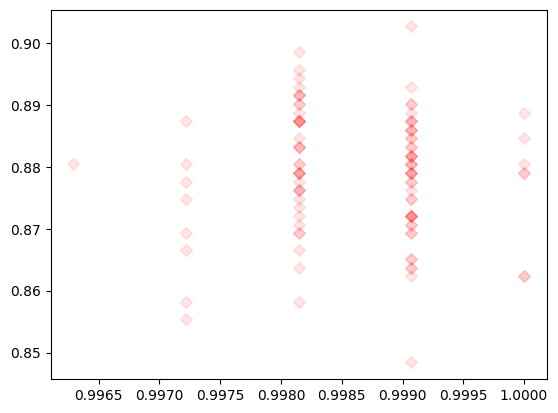

In [12]:
elmc = ELMClassifier(n_hidden=500, activation_func='multiquadric')
tr, ts = res_dist(dgx, dgy, elmc, n_runs=100, random_state=0)
plt.scatter(tr, ts, alpha=0.1, marker='D', c='r')

0.9757494137676193 0.9574473162536483


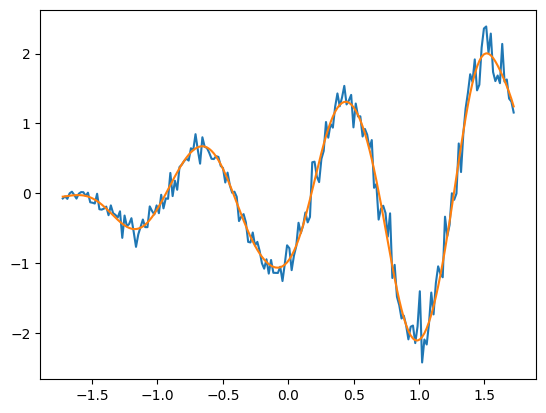

In [13]:
elmr = ELMRegressor(random_state=0, activation_func='gaussian', alpha=0.0)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))

0.8539052299524694 0.8438980713759163


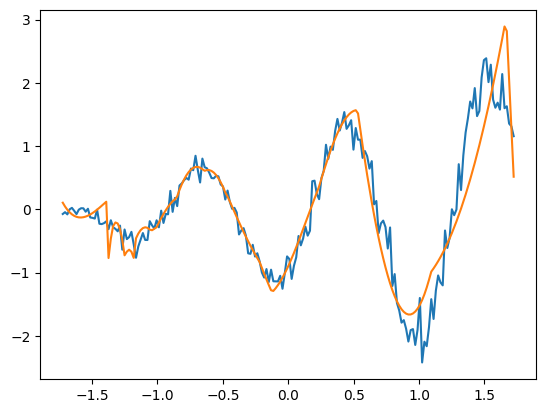

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
elmr = Pipeline(
    [
        ('rhl', RandomLayer(random_state=0, activation_func='multiquadric')),
        ('lr', LinearRegression(fit_intercept=False))
    ]
)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))

0
20
40
60
80
100
120
140
160
180

Time: 22.659 secs
Test Min: 0.606 Mean: 0.672 Max: 0.737 SD: 0.027
Test Min: 0.734 Mean: 0.784 Max: 0.823 SD: 0.016



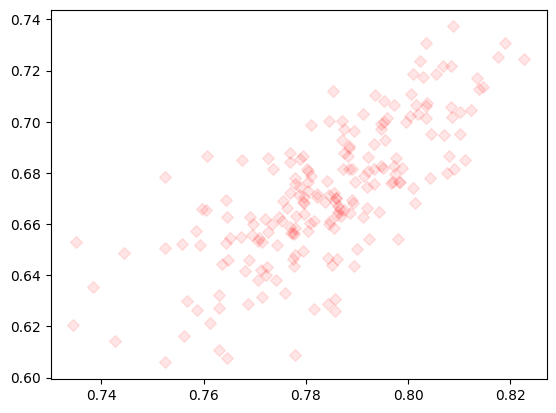

In [15]:
rhl = RandomLayer(n_hidden=200, alpha=1.0)
elmr = GenELMRegressor(hidden_layer=rhl)
tr, ts = res_dist(mrx, mry, elmr, n_runs=200, random_state=0)
plt.scatter(tr, ts, alpha=0.1, marker='D', c='r')

0.9749866396617243 0.9573187133337618


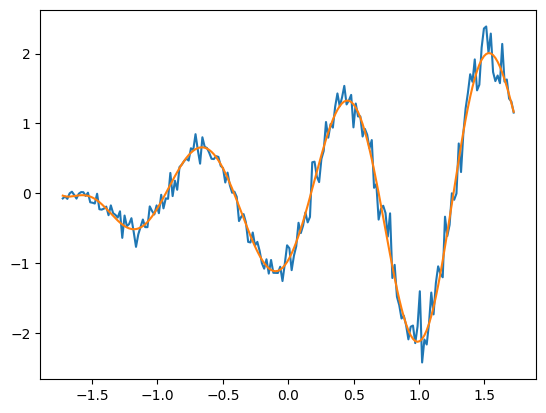

In [16]:
rhl = RBFRandomLayer(n_hidden=15, rbf_width=0.8)
elmr = GenELMRegressor(hidden_layer=rhl)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))

c:\Users\B294MQ\Environments\py39\_cdk2.pyVenv_\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.9702709156488231 0.9452682709298682


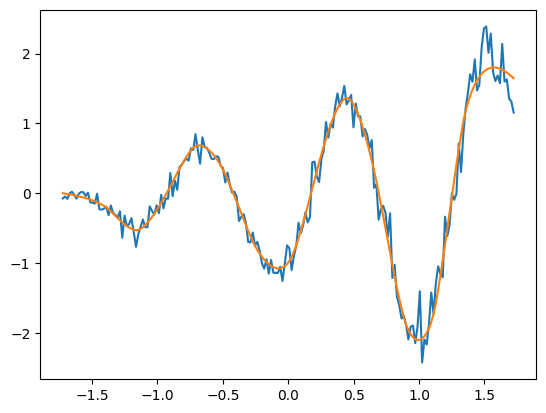

In [17]:
nh = 15
(ctrs, _, _) = k_means(xtoy_train, nh)
unit_rs = np.ones(nh)

# rhl = RBFRandomLayer(n_hidden=nh, activation_func='inv_multiquadric')
# rhl = RBFRandomLayer(n_hidden=nh, centers=ctrs, radii=unit_rs)
rhl = GRBFRandomLayer(n_hidden=nh, grbf_lambda=.0001, centers=ctrs)
elmr = GenELMRegressor(hidden_layer=rhl)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))


In [18]:
rbf_rhl = RBFRandomLayer(n_hidden=100, random_state=0, rbf_width=0.01)
elmc_rbf = GenELMClassifier(hidden_layer=rbf_rhl)
elmc_rbf.fit(dgx_train, dgy_train)
print(elmc_rbf.score(dgx_train, dgy_train), elmc_rbf.score(dgx_test, dgy_test))

def powtanh_xfer(activations, power=1.0):
    return pow(np.tanh(activations), power)

tanh_rhl = MLPRandomLayer(n_hidden=100, activation_func=powtanh_xfer, activation_args={'power':3.0})
elmc_tanh = GenELMClassifier(hidden_layer=tanh_rhl)
elmc_tanh.fit(dgx_train, dgy_train)
print(elmc_tanh.score(dgx_train, dgy_train), elmc_tanh.score(dgx_test, dgy_test))


0.9617258176757133 0.9166666666666666
0.9464161447459986 0.9083333333333333


In [19]:
rbf_rhl = RBFRandomLayer(n_hidden=100, rbf_width=0.01)
tr, ts = res_dist(dgx, dgy, GenELMClassifier(hidden_layer=rbf_rhl), n_runs=100, random_state=0)

0
10
20
30
40
50
60
70
80
90

Time: 6.933 secs
Test Min: 0.914 Mean: 0.927 Max: 0.939 SD: 0.006
Test Min: 0.959 Mean: 0.967 Max: 0.974 SD: 0.003



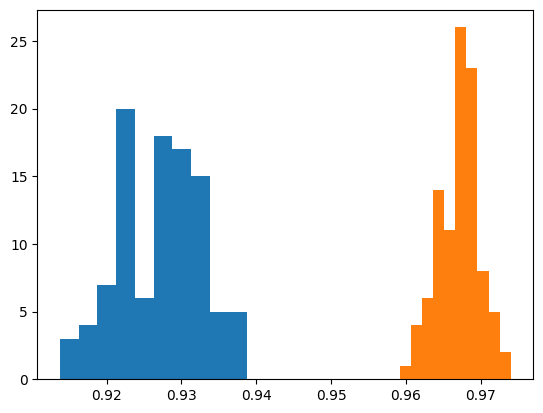

In [20]:
plt.hist(ts)
plt.hist(tr)
print()

0
10
20
30
40
50
60
70
80
90

Time: 5.109 secs
Test Min: 0.234 Mean: 0.305 Max: 0.375 SD: 0.029
Test Min: 0.897 Mean: 0.909 Max: 0.924 SD: 0.006




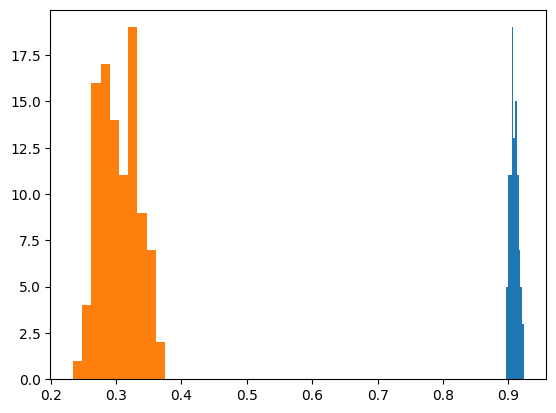

In [21]:
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
tr, ts = res_dist(dbx, dby, RandomForestRegressor(n_estimators=15), n_runs=100, random_state=0)
plt.hist(tr)
plt.hist(ts)
print()

0
10
20
30
40
50
60
70
80
90

Time: 0.108 secs
Test Min: 0.361 Mean: 0.389 Max: 0.411 SD: 0.011
Test Min: 0.571 Mean: 0.584 Max: 0.596 SD: 0.005



<function print>

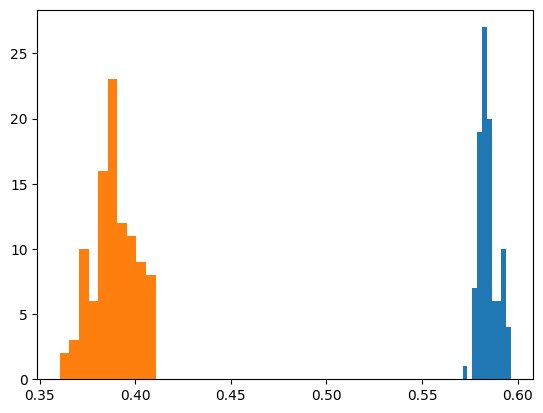

In [22]:
rhl = RBFRandomLayer(n_hidden=15, rbf_width=0.1)
tr,ts = res_dist(dbx, dby, GenELMRegressor(rhl), n_runs=100, random_state=0)
plt.hist(tr)
plt.hist(ts)
print

In [23]:
elmc = ELMClassifier(n_hidden=1000, activation_func='gaussian', alpha=0.0, random_state=0)
elmc.fit(dgx_train, dgy_train)
print(elmc.score(dgx_train, dgy_train), elmc.score(dgx_test, dgy_test))

0.10716771050800278 0.08333333333333333


In [24]:
elmc = ELMClassifier(n_hidden=500, activation_func='hardlim', alpha=1.0, random_state=0)
elmc.fit(dgx_train, dgy_train)
print(elmc.score(dgx_train, dgy_train), elmc.score(dgx_test, dgy_test))


0.9993041057759221 0.9277777777777778


0.8585594314871885 0.814394001947798


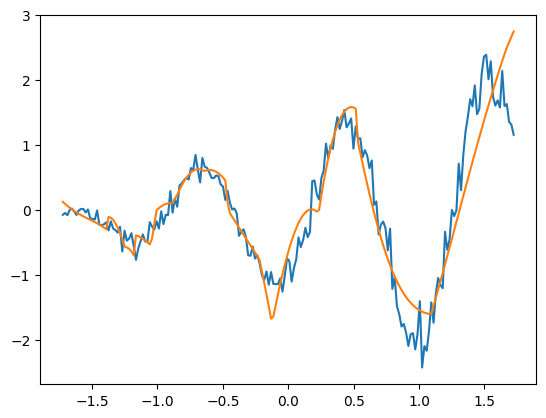

In [25]:
elmr = ELMRegressor(random_state=0)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))

0.9274175754289422 0.9062543431581013


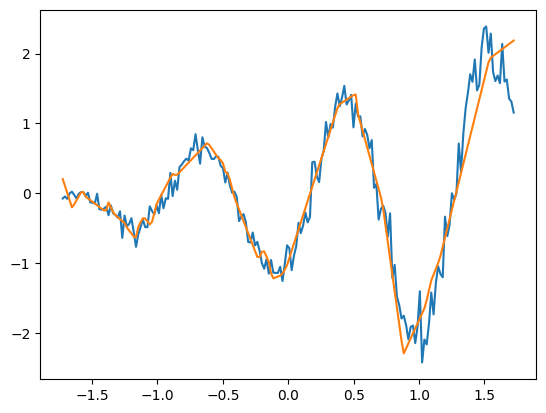

In [26]:
elmr = ELMRegressor(activation_func='inv_tribas', random_state=0)
elmr.fit(xtoy_train, ytoy_train)
print(elmr.score(xtoy_train, ytoy_train), elmr.score(xtoy_test, ytoy_test))
plt.plot(xtoy, ytoy, xtoy, elmr.predict(xtoy))